# Replication

https://link.springer.com/chapter/10.1007/978-3-642-41822-8_15

Description of experiment:

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt

import torch
from torch import nn
from torch import optim
from torch.utils.data import DataLoader
import torch.nn.functional as F

from datasets import get_mnist_dataset, get_data_loader
from utils import *
from models import *

Processing...
Done!


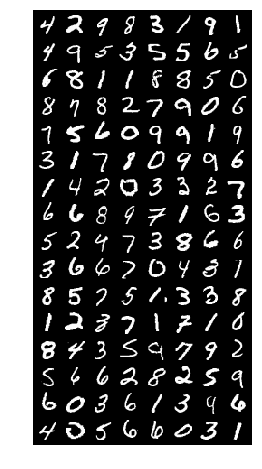

In [3]:
trainset, testset = get_mnist_dataset()
trainloader, testloader = get_data_loader(trainset, testset)
batch, labels = next(iter(trainloader))
plot_batch(batch)

In [ ]:
def train(encoder, decoder, optimizer, criterion):
    for X, y in trainloader:
        X_var, y_var = Variable(X), Variable(y)
        s = encoder(X_var)
        X_hat = decoder(s)
        loss = criterion(s, X_hat)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

def evaluate(encoder, decoder, loader):
    for X, y in loader:
        X_var, y_var = Variable(X), Variable(y)
        s = encoder(X_var)
        X_hat = decoder(s)
        # do something

In [ ]:
model = NonLinearAutoEncoder(hidden_units=10)
